In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter

df = pd.read_csv('/content/drive/MyDrive/scraped-data/up-data.tsv', sep='\t')

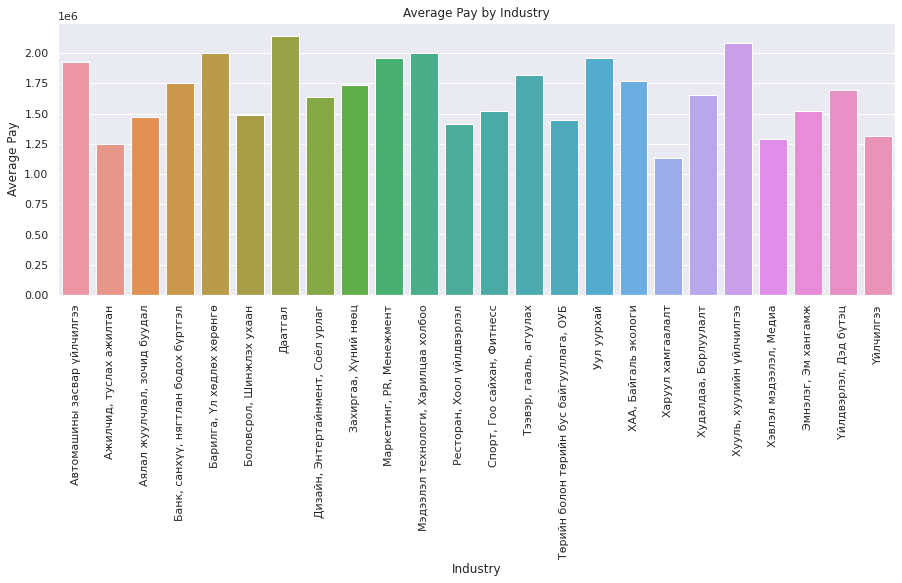

In [ ]:
pay_by_industry = df.groupby('Industry')['Average Pay'].mean().reset_index()

sns.set(rc={'figure.figsize':(15, 5)})
sns.barplot(x='Industry', y='Average Pay', data=pay_by_industry)
plt.xticks(rotation=90)
plt.title('Average Pay by Industry')
plt.show()

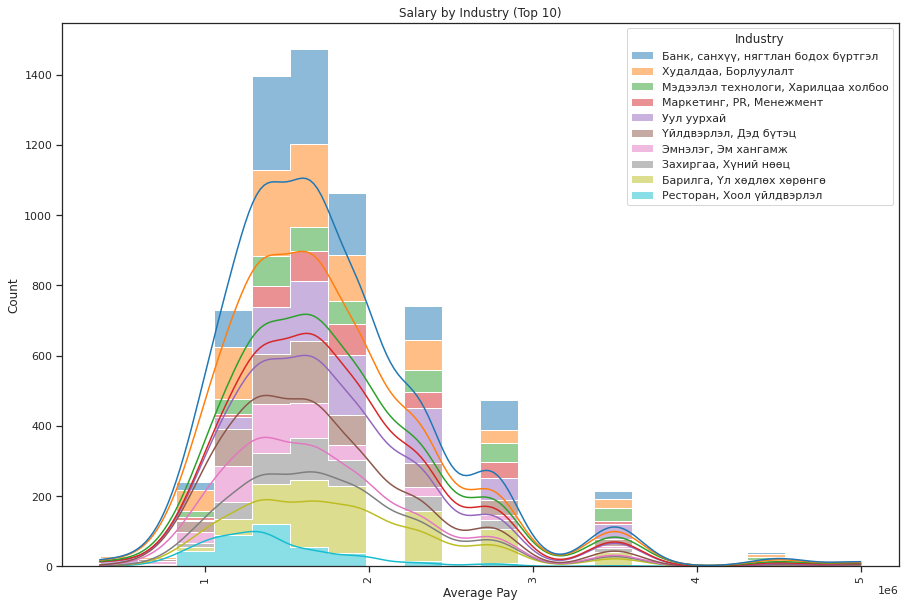

In [4]:
sns.set(rc={'figure.figsize':(15, 10)})
sns.set_style('ticks')

top_industries = df['Industry'].value_counts().head(10).index.tolist()

df_top = df[df['Industry'].isin(top_industries)]

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
          '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

sns.histplot(data=df_top, x='Average Pay', hue='Industry', palette=colors,
             element='step', kde=True, multiple='stack', bins=20)

plt.xticks(rotation=90)
plt.title('Salary by Industry (Top 10)')
plt.show()
# ungu uurchluh
# Industry top 10 awah

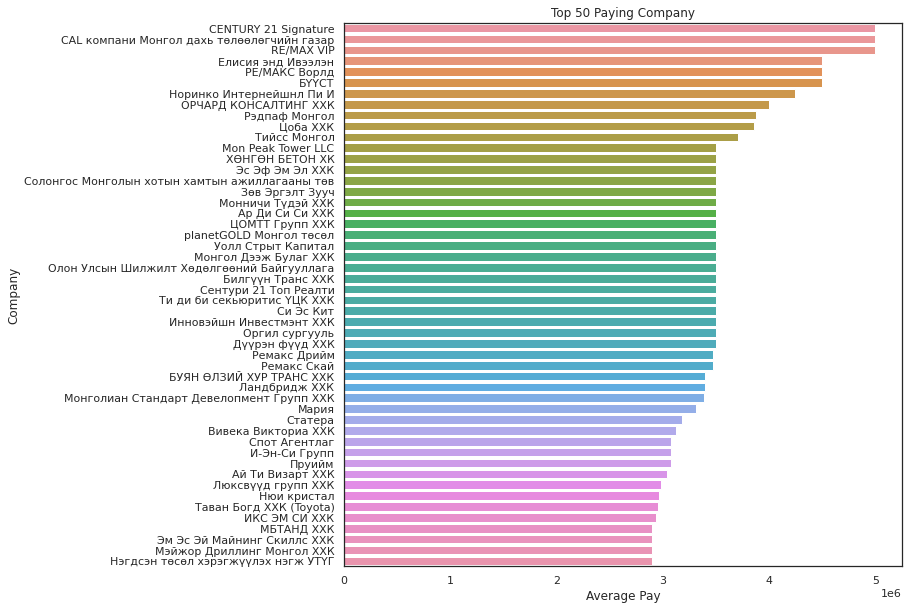

In [ ]:
df_mean_salary = df.groupby('Company')['Average Pay'].mean().reset_index()

df_mean_salary = df_mean_salary.sort_values(by='Average Pay', ascending=False)

sns.set(rc={'figure.figsize':(10, 10)})

sns.set_style('white')
sns.barplot(x='Average Pay', y='Company', data=df_mean_salary.head(50))
plt.title('Top 50 Paying Company')
plt.show()
# төрөл өөр өнгөтэй

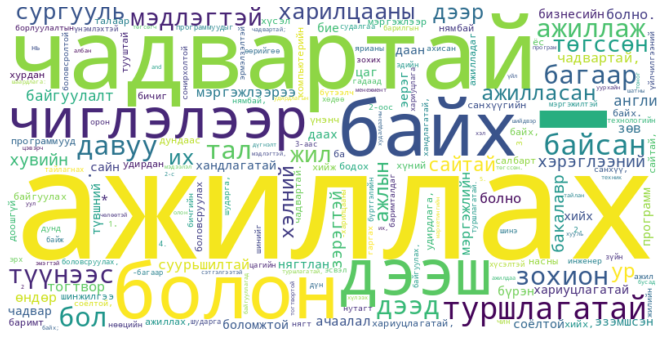

In [ ]:
from wordcloud import WordCloud
req_text = ' '.join(df['Job Requirement'].astype(str))

word_counts = Counter(req_text.lower().split())

word_counts.pop('nan', None)

wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_counts)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

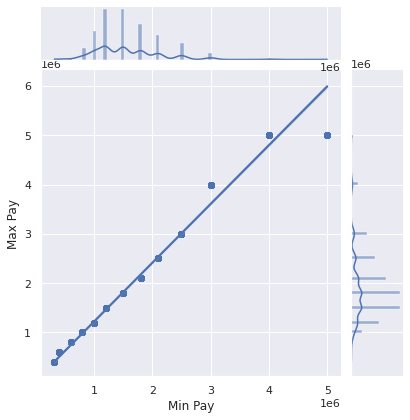

In [ ]:
sns.set_style('darkgrid')
sns.jointplot(x='Min Pay', y='Max Pay', data=df, kind='reg')


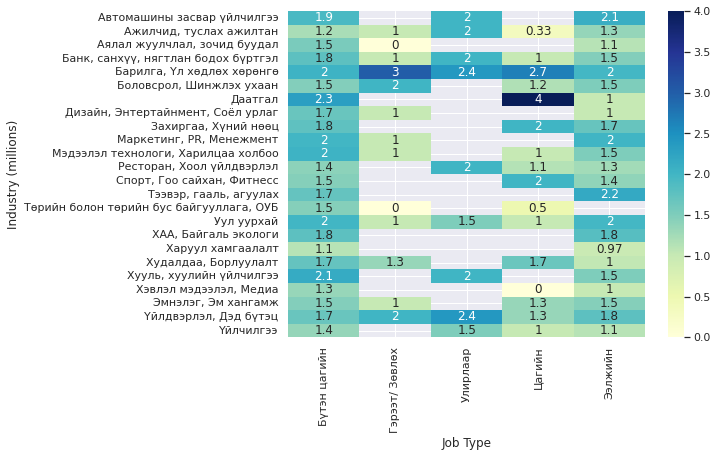

In [5]:
df_rounded = df.copy()
df_rounded['Average Pay'] = round(df_rounded['Average Pay'] / 1000000)
heatmap_data = df_rounded.pivot_table(values='Average Pay', index='Industry', columns='Job Type')

sns.set_style('darkgrid')
sns.set(rc={'axes.labelsize': 12, 'figure.figsize': (8, 6)})
ax = sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True)
ax.set_ylabel('Industry (millions)')

plt.show()

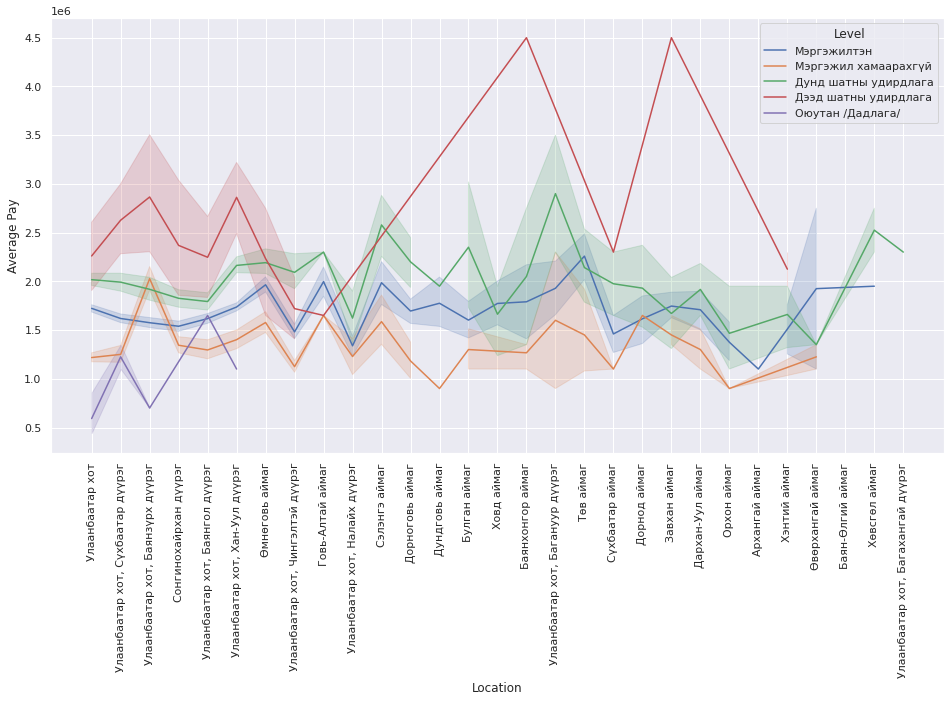

In [ ]:
sns.set(rc={'figure.figsize': (16, 8)})


sns.lineplot(data=df, x='Location', y='Average Pay', hue='Level')
plt.xticks(rotation=90)
plt.show()

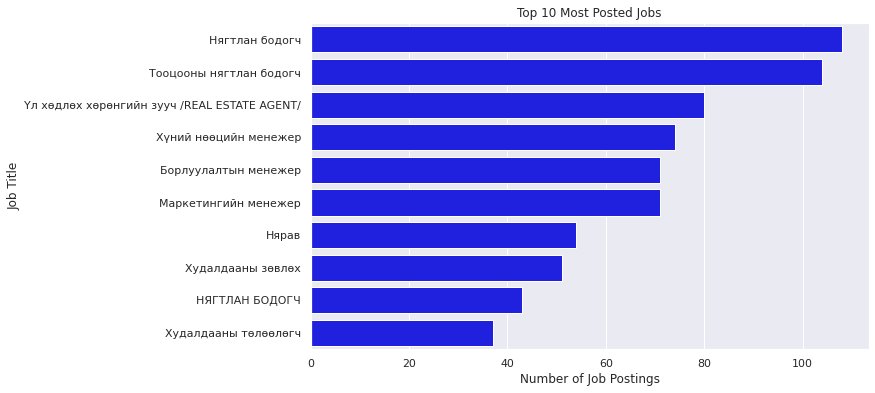

In [ ]:
top_jobs = df['Job Title'].value_counts().nlargest(10)

sns.set_style('darkgrid')
plt.figure(figsize=(10,6))
sns.barplot(y=top_jobs.index, x=top_jobs.values, color='blue')

plt.title('Top 10 Most Posted Jobs')
plt.xlabel('Number of Job Postings')
plt.ylabel('Job Title')

plt.show()

Text(0, 0.5, 'Job Title')

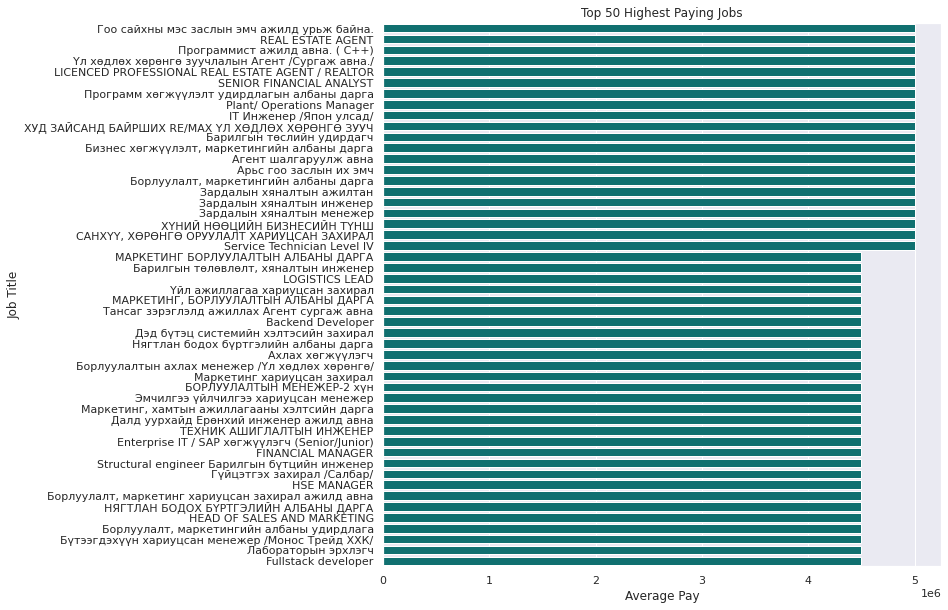

In [ ]:
job_counts = df['Job Title'].value_counts()
job_avg_pay = df.groupby('Job Title')['Average Pay'].mean().reset_index()

job_avg_pay = job_avg_pay.sort_values('Average Pay', ascending=False)

sns.set_style('darkgrid')
plt.figure(figsize=(10,10))
sns.barplot(x='Average Pay', y='Job Title', data=job_avg_pay.head(50), color='teal')

plt.title('Top 50 Highest Paying and Most Posted Jobs')
plt.xlabel('Average Pay')
plt.ylabel('Job Title')

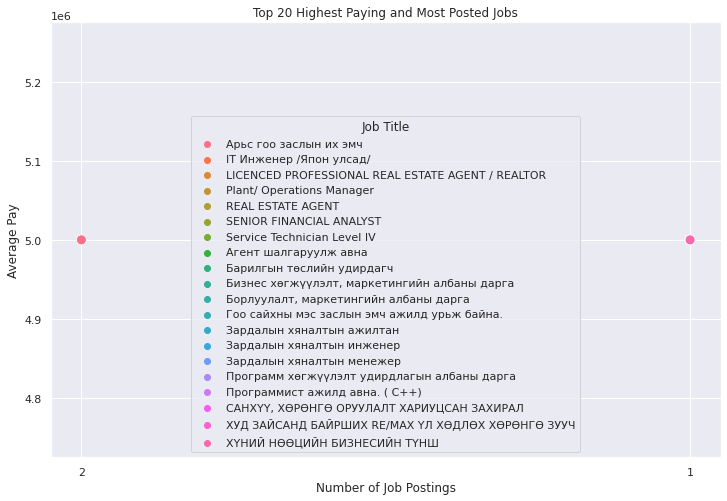

In [15]:
job_counts = df['Job Title'].value_counts()
job_avg_pay = df.groupby('Job Title')['Average Pay'].mean().reset_index()

job_counts = job_counts.reset_index()
job_counts = job_counts.rename(columns={'index': 'Job Title', 'Job Title': 'Job Title Count'})
job_counts['Job Title Count'] = job_counts['Job Title Count'].astype(str)

job_data = pd.merge(job_avg_pay, job_counts, on='Job Title')

job_data = job_data.sort_values(['Average Pay', 'Job Title Count'], ascending=[False, False])

top_jobs = job_data.head(20)

sns.set_style('darkgrid')
plt.figure(figsize=(12, 8))

sns.scatterplot(x='Job Title Count', y='Average Pay', data=top_jobs, hue='Job Title', s=100)

plt.title('Top 20 Highest Paying and Most Posted Jobs')
plt.xlabel('Number of Job Postings')
plt.ylabel('Average Pay')

plt.show()
